## Classification Poject Step by Step

In [ ]:
#1. Model_accuracy
#2. Best_model
#3.Best_parameter

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

#### Prepare multiple models 

In [12]:
models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier(),"SVM":SVC()
        ,"KNN":KNeighborsClassifier(),"GNB":GaussianNB(),"RandomForestClassifier":RandomForestClassifier(),
       "AdaBoostClassifier":AdaBoostClassifier(),"GradientBoostingClassifier":GradientBoostingClassifier(),
       "XGBClassifier":XGBClassifier()}

#### Function for training the multiple models and generating accuracy 

In [37]:
#modelAccuracy-> models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        if(scaleFlag==1):
            model_pipeline=Pipeline([("MinMax",MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
            model_pipeline=Pipeline([("standardScaler",StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #model train and prediction
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        acc=accuracy_score(ytest,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result


#### Function for getting a model with highest accuracy 

In [ ]:
def bestModel(model_result):
    high=0
    for name,acc in model_result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best model is ",model_name," with Accuracy ",high)

#### Function for getting a best models best parameters 

In [20]:
def bestParameter(model,params,x,y):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring="accuracy")
    res=grid_cv.fit(x,y)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)
    

#### Importing Data to find out suitable model for this classification dataset


In [21]:
df=pd.read_csv("../Data/sonar.all-data.csv",header=None)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [23]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [25]:
le=LabelEncoder()
df[60]=le.fit_transform(df[60])

In [45]:
x=df.drop(columns=[60])
y=df[60]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
acc=modelAccuracy(models,x,y,0)

The Accuracy for  LogisticRegression  is : 0.8333333333333334
The Accuracy for  DecisionTreeClassifier  is : 0.6904761904761905
The Accuracy for  SVM  is : 0.7857142857142857
The Accuracy for  KNN  is : 0.7857142857142857
The Accuracy for  GNB  is : 0.6666666666666666
The Accuracy for  RandomForestClassifier  is : 0.8571428571428571
The Accuracy for  AdaBoostClassifier  is : 0.8809523809523809
The Accuracy for  GradientBoostingClassifier  is : 0.9047619047619048


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Accuracy for  XGBClassifier  is : 0.8809523809523809


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [39]:
acc

{'LogisticRegression': 0.8333333333333334,
 'DecisionTreeClassifier': 0.6904761904761905,
 'SVM': 0.7857142857142857,
 'KNN': 0.7857142857142857,
 'GNB': 0.6666666666666666,
 'RandomForestClassifier': 0.8571428571428571,
 'AdaBoostClassifier': 0.8809523809523809,
 'GradientBoostingClassifier': 0.9047619047619048,
 'XGBClassifier': 0.8809523809523809}

In [40]:
bestModel(acc)

Best model is  GradientBoostingClassifier with Accuracy  0.9047619047619048


In [46]:
model=GradientBoostingClassifier()
params={"loss":['deviance', 'exponential'],"learning_rate":[0.3,0.1,0.5,0.001,0.01,0.05],"n_estimators":[10,50,100]}
bestParameter(model,params,xtrain,ytrain)

Best Parameters are  {'learning_rate': 0.5, 'loss': 'deviance', 'n_estimators': 100}
Best Accuracy is  0.8337009803921569


#### Retraining The model using best parameters

In [49]:
#Retraining The model using best parameters
model=GradientBoostingClassifier(learning_rate=0.5, loss='deviance',n_estimators= 100)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

#### Evaluation of Best Model on testing Dataset

Accuracy is : 0.9047619047619048
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.90      0.90      0.90        21

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



<AxesSubplot:>

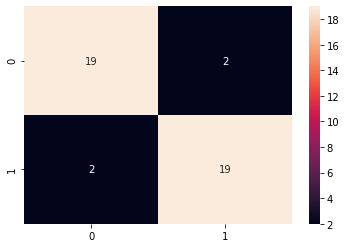

In [50]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)